# Практикум №3
# Абраменко Микити Олександровича, студента групи КА-01
# 1 варіант
## Реалізація багатошарового персептрона для класифікації зображень MNIST в TensorFlow з нуля

# Імпорт бібліотек, датасету, та його трансформація для подальшого використання

# ЩО БУЛО ПЕРЕРОБЛЕНО:
Тепер використовується функція втрат з tensorflow, а не написана вручну, код був переписаний, щоб використовувати саме цю функцію та ще декілька змін у коді

Це покращило результати, але й потребувує тепер більше часу

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_datasets as tfds

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score

X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)
y = y.astype(int)
X = ((X / 255.) - .5) * 2 # нормалізація данних

X_train, X_test, y_train_not_encoded, y_test_not_encoded = train_test_split(
    X, y, test_size=10000, random_state=17, stratify=y)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


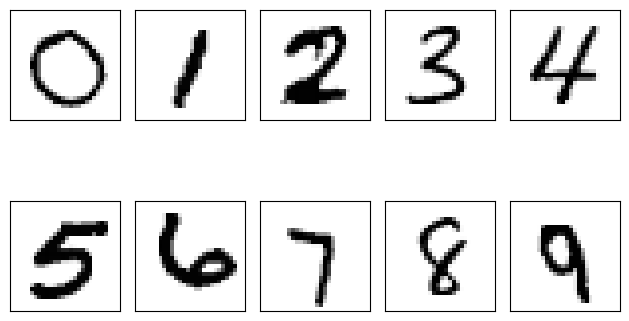

In [3]:
fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True)
ax = ax.flatten()
for i in range(10):
    img = X_train[y_train_not_encoded == i][:1].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

In [4]:
pd.DataFrame(X_train).describe()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
count,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.0,60000.0,60000.0,60000.0
mean,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-0.998555,-0.999226,-0.999608,-0.999853,-0.999902,-0.999984,-1.0,-1.0,-1.0,-1.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.045943,0.033444,0.022961,0.013196,0.012205,0.002718,0.0,0.0,0.0,0.0
min,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.0,-1.0,-1.0
25%,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.0,-1.0,-1.0
50%,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.0,-1.0,-1.0
75%,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.0,-1.0,-1.0
max,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,0.992157,0.992157,0.984314,0.984314,0.992157,-0.513725,-1.0,-1.0,-1.0,-1.0


OHE для лейблів 

In [5]:
OHE = OneHotEncoder(categories=[np.arange(10)])

y_train_encoded = OHE.fit_transform(y_train_not_encoded.reshape(-1, 1))
y_test_encoded = OHE.transform(y_test_not_encoded.reshape(-1, 1))

Порівняємо результат

In [6]:
y_train_not_encoded

array([0, 7, 3, ..., 8, 9, 8])

In [7]:
pd.DataFrame(y_train_encoded.toarray())

,0,1,2,3,4,5,6,7,8,9
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
59995,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
59996,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
59998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


Як ми можемо бачити, наш енкодінг спрацював правильно

In [8]:
X_train, X_test = tf.constant(X_train, dtype=tf.float32), tf.constant(X_test, dtype=tf.float32)
y_train, y_test = tf.constant(y_train_encoded.toarray(), dtype=tf.float32), tf.constant(y_test_encoded.toarray(), dtype=tf.float32)

# нейрона мережа без шарів

Почнемо зі створення кастомної функції втрат, перехресної ентропiї

In [9]:
def loss(target_y, predicted_y):
  return tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels = target_y, logits = predicted_y))
  # return -tf.reduce_sum(tf.reduce_mean(target_y * tf.math.log(predicted_y + 1e-12), axis=0))

Сам класс:

In [10]:
class NoLayersModel(tf.Module):
  def __init__(self, in_features, out_features, name=None):
    super().__init__(name=name)
    self.w = tf.Variable(tf.random.normal([in_features, out_features]), name='w')
    self.b = tf.Variable(tf.random.normal([1]), name='b')

  def predict(self, X):
    return tf.argmax(tf.nn.softmax(self.forward(X)), axis=1)

  def forward(self, X):
    return (tf.matmul(X, self.w) + self.b)

no_layer_model = NoLayersModel(X_train.shape[1], y_train.shape[1], name='no_layers')

Функція навчання

In [11]:
def train_nolayers(model, X, y, learning_rate):

  with tf.GradientTape() as tape:
    current_loss = loss(y, model.forward(X))
  
  dw, db = tape.gradient(current_loss, [model.w, model.b])

  model.w.assign_sub(learning_rate * dw)
  model.b.assign_sub(learning_rate * db)

Наш цикл для навчання, одразу додамо функції навчання для наступних моделей, щоб не переписувати одне й те саме багато разів, також додамо можливість дострокового закінчення

In [12]:
def training_loop(model, X_train, y_train, layers, eps=1e-4, patience=50, lrng_rate=0.2, epochs=20):

  i = 0

  loss_lst = []
  val_loss_lst = []
  acc_lst = []
  val_acc_lst = []

  for epoch in range(epochs):
    if layers == 0:
      train_nolayers(model, X_train, y_train, learning_rate=lrng_rate)
    elif layers == 1:
      train_hidden(model, X_train, y_train, learning_rate=lrng_rate)
    else:
      train_two_hidden(model, X_train, y_train, learning_rate=lrng_rate)

    acc_lst.append(accuracy_score(y_train_not_encoded, model.predict(X_train)))
    val_acc_lst.append(accuracy_score(y_test_not_encoded, model.predict(X_test)))
    
    train_loss = loss(y_train, model.forward(X_train))
    val_loss = loss(y_test, model.forward(X_test))

    loss_lst.append(train_loss)
    val_loss_lst.append(val_loss)

    if epoch % 10 == 0:
      print(f'Epoch {epoch}: Loss = {train_loss.numpy():.4f} Val Loss = {val_loss.numpy():.4f}, Val acc = {val_acc_lst[epoch]} \n')
    try:
      if np.abs(val_loss_lst[-2] - val_loss_lst[-1]) < eps:
        i += 1
    except: pass

    if i >= patience:
      print('validation loss is not improving, the loop is stopped')
      break

  return {'loss': loss_lst, 'val_loss': val_loss_lst, 'acc': acc_lst, 'val_acc': val_acc_lst}

In [13]:
print(f"Starting loss: {loss(y_train, no_layer_model.forward(X_train)).numpy()}")

history_nolayer = training_loop(no_layer_model, X_train, y_train, layers=0, epochs=100)

Starting loss: 13.534629867841822
Epoch 0: Loss = 0.5155 Val Loss = 0.3740,  Val acc = 0.8921999931335449

Epoch 10: Loss = 0.2809 Val Loss = 0.2962,  Val acc = 0.9154999852180481



Text(0.5, 1.0, 'Loss')

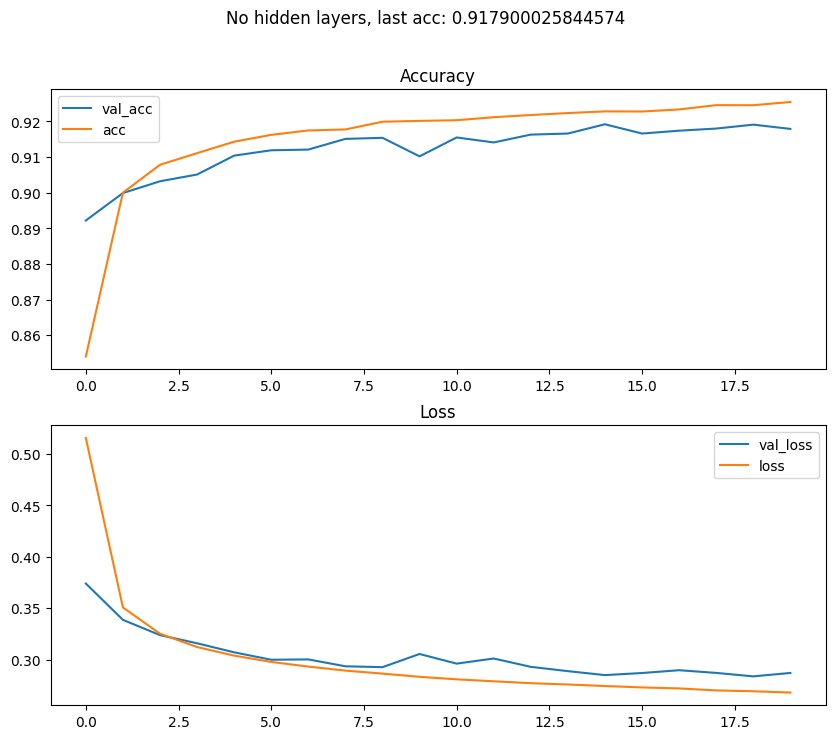

In [14]:
fig, ax = plt.subplots(2, 1, figsize=(10, 8))
fig.suptitle(f'No hidden layers, last acc: {history_nolayer["val_acc"][-1]}')

ax[0].plot(history_nolayer['val_acc'], label='val_acc')
ax[0].plot(history_nolayer['acc'], label='acc')
ax[0].legend()
ax[0].set_title('Accuracy')

ax[1].plot(history_nolayer['val_loss'], label='val_loss')
ax[1].plot(history_nolayer['loss'], label='loss')
ax[1].legend()
ax[1].set_title('Loss')

Як ми бачимо наша модель яка зовсім не мала скритих шарів показала себе дуже гарно, більше нічого додати, з переробленим кодом вони навчаються краще і майже з першої епохи мають високі результати, але великий мінус, що це займає дуже багато часу

# Моделі зі скритими шарами:

## Спробуємо спочатку з одним:

In [15]:
class HiddenModel(tf.Module):
  def __init__(self, in_features, out_features, name=None):
    super().__init__(name=name)
    self.w0 = tf.Variable(tf.random.normal([in_features, 50]), name='w0')
    self.b0 = tf.Variable(tf.random.normal([1]), name='b0')

    self.w1 = tf.Variable(tf.random.normal([50, 15]), name='w1')
    self.b1 = tf.Variable(tf.random.normal([1]), name='b1')

    self.w2 = tf.Variable(tf.random.normal([15, 10]), name='w2')
    self.b2 = tf.Variable(tf.random.normal([1]), name='b2')

  def predict(self, X):
    return tf.argmax(tf.nn.softmax(self.forward(X)), axis=1)

  def forward(self, x0):
    x1 = tf.nn.relu(tf.matmul(x0, self.w0) + self.b0)
    x2 = tf.nn.relu(tf.matmul(x1, self.w1) + self.b1)
    return (tf.matmul(x2, self.w2) + self.b2)

hidden_model = HiddenModel(X_train.shape[1], y_train.shape[1])

Також створимо для неї функції навчання, адже ми тепер повинні обновлювати більшу кількість параметрів, я вирішив не створювати одну функцію навчання для усіх моделей як це було з циклом, адже як на мене це було дуже складно

In [16]:
def train_hidden(model, X, y, learning_rate):

  with tf.GradientTape() as tape:
    current_loss = loss(y, model.forward(X))

  dw2, dw1, dw0, db2, db1, db0 = tape.gradient(current_loss, [model.w2, model.w1, model.w0, model.b2, model.b1, model.b0])

  model.w2.assign_sub(learning_rate * dw2)
  model.b2.assign_sub(learning_rate * db2)

  model.w1.assign_sub(learning_rate * dw1)
  model.b1.assign_sub(learning_rate * db1)

  model.w0.assign_sub(learning_rate * dw0)
  model.b0.assign_sub(learning_rate * db0)

In [17]:
print(f"Starting loss: {loss(y_train, hidden_model.forward(X_train)).numpy()}")

history_one_hid = training_loop(hidden_model, X_train, y_train, layers=1, epochs=20)

Starting loss: 11.217368418527426
Epoch 0: Loss = 0.4691 Val Loss = 0.3204,  Val acc = 0.9059000015258789

Epoch 10: Loss = 0.1221 Val Loss = 0.1355,  Val acc = 0.9603000283241272



Text(0.5, 1.0, 'Loss')

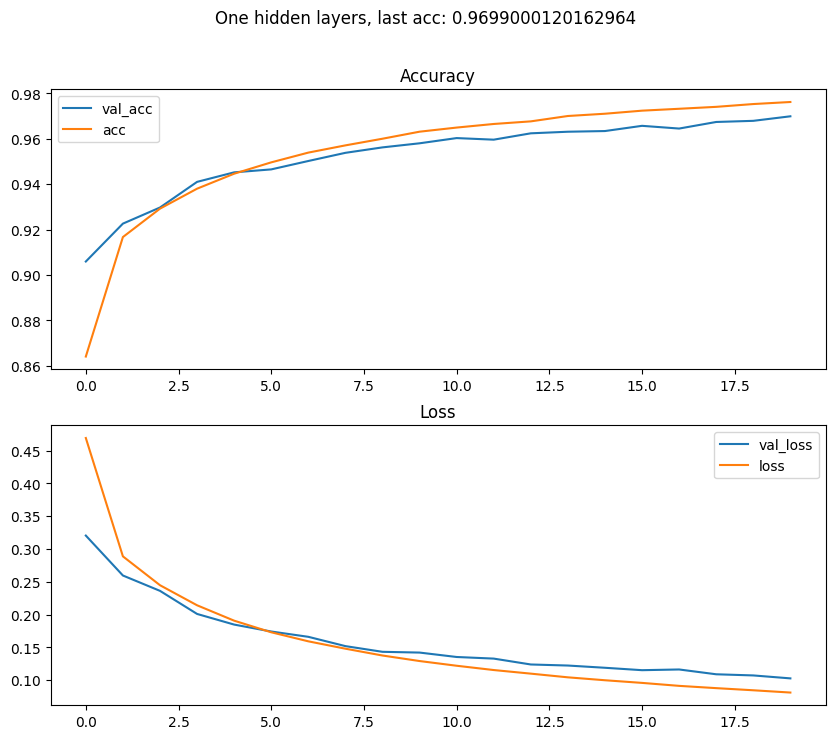

In [18]:
fig, ax = plt.subplots(2, 1, figsize=(10, 8))
fig.suptitle(f'One hidden layers, last acc: {history_one_hid["val_acc"][-1]}')

ax[0].plot(history_one_hid['val_acc'], label='val_acc')
ax[0].plot(history_one_hid['acc'], label='acc')
ax[0].legend()
ax[0].set_title('Accuracy')
 
ax[1].plot(history_one_hid['val_loss'], label='val_loss')
ax[1].plot(history_one_hid['loss'], label='loss')
ax[1].legend()
ax[1].set_title('Loss')

Як ми бачимо результати стали кращими, ми отримали ситуацію, коли наша точність дуже швидко стає високою, функція втрат з тензорфлоу справді виявилася кращою, але навчається модель набагато довше

## Два шари:


In [19]:
class TwoLayersModel(tf.Module):
  def __init__(self, in_features, out_features, name=None):
    super().__init__(name=name)
    self.w0 = tf.Variable(tf.random.normal([in_features, 100]), name='w0')
    self.b0 = tf.Variable(tf.random.normal([1]), name='b0')

    self.w1 = tf.Variable(tf.random.normal([100, 50]), name='w1')
    self.b1 = tf.Variable(tf.random.normal([1]), name='b1')

    self.w2 = tf.Variable(tf.random.normal([50, 15]), name='w2')
    self.b2 = tf.Variable(tf.random.normal([1]), name='b2')

    self.w3 = tf.Variable(tf.random.normal([15, out_features]), name='w3')
    self.b3 = tf.Variable(tf.random.normal([1]), name='b3')

  def forward(self, x0):
    x1 = tf.nn.relu(tf.matmul(x0, self.w0) + self.b0)
    x2 = tf.nn.relu(tf.matmul(x1, self.w1) + self.b1)
    x3 = tf.nn.relu(tf.matmul(x2, self.w2) + self.b2)
    return (tf.matmul(x3, self.w3) + self.b3)

  def predict(self, X):
    return tf.argmax(tf.nn.softmax(self.forward(X)), axis=1)

two_layers_model = TwoLayersModel(X_train.shape[1], y_train.shape[1])

In [20]:
def train_two_hidden(model, X, y, learning_rate):

  with tf.GradientTape() as tape:
    current_loss = loss(y, model.forward(X))

  dw3, dw2, dw1, dw0, db3, db2, db1, db0 = tape.gradient(current_loss, [model.w3, model.w2, model.w1, model.w0, model.b3, model.b2, model.b1, model.b0])

  model.w3.assign_sub(learning_rate * dw3)
  model.b3.assign_sub(learning_rate * db3)

  model.w2.assign_sub(learning_rate * dw2)
  model.b2.assign_sub(learning_rate * db2)

  model.w1.assign_sub(learning_rate * dw1)
  model.b1.assign_sub(learning_rate * db1)

  model.w0.assign_sub(learning_rate * dw0)
  model.b0.assign_sub(learning_rate * db0)

In [21]:
print(f"Starting loss: {loss(y_train, two_layers_model.forward(X_train)).numpy()}")

history_two_hid = training_loop(two_layers_model, X_train, y_train, layers=2, epochs=20)

Starting loss: 11.122067902199106
Epoch 0: Loss = 0.5102 Val Loss = 0.3318,  Val acc = 0.9003999829292297

Epoch 10: Loss = 0.1008 Val Loss = 0.1193,  Val acc = 0.9634000062942505



Text(0.5, 1.0, 'Loss')

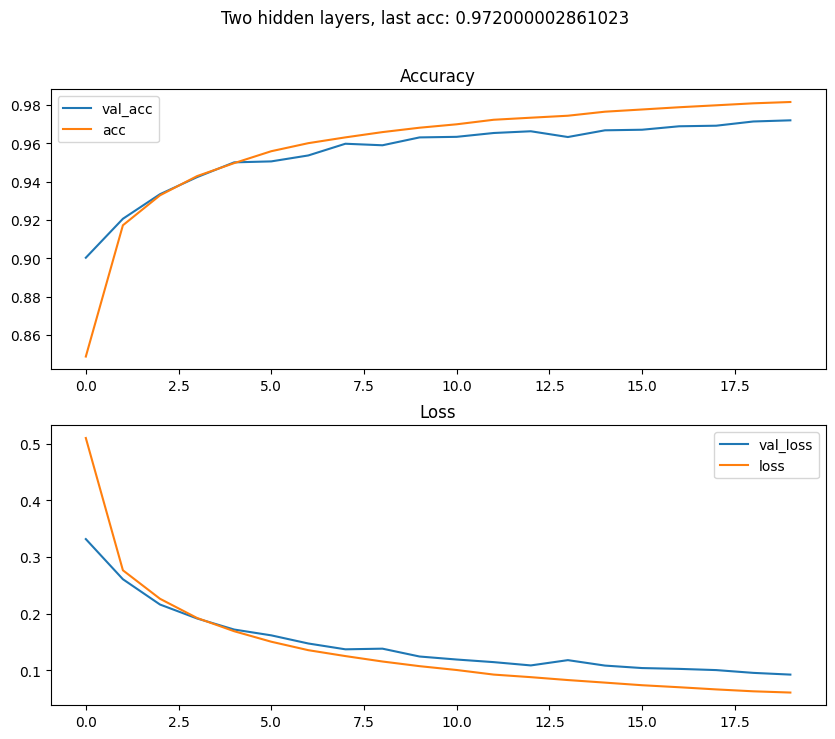

In [22]:
fig, ax = plt.subplots(2, 1, figsize=(10, 8))
fig.suptitle(f'Two hidden layers, last acc: {history_two_hid["val_acc"][-1]}')

ax[0].plot(history_two_hid['val_acc'], label='val_acc')
ax[0].plot(history_two_hid['acc'], label='acc')
ax[0].legend()
ax[0].set_title('Accuracy')

ax[1].plot(history_two_hid['val_loss'], label='val_loss')
ax[1].plot(history_two_hid['loss'], label='loss')
ax[1].legend()
ax[1].set_title('Loss')

Тут ситуація схожа на попердню

# Порівняння моделей:

Text(0.5, 1.0, 'Validation loss')

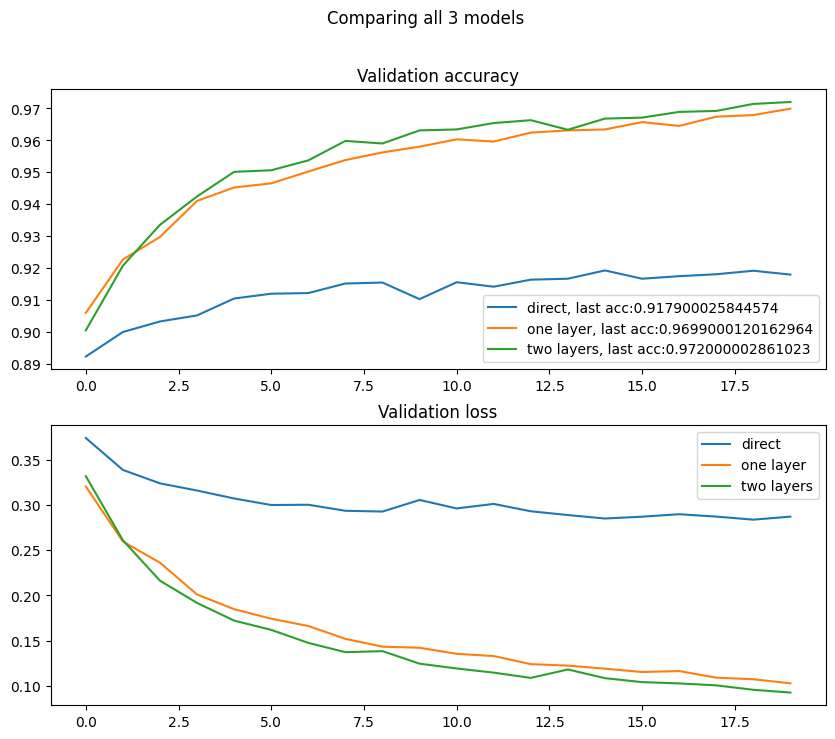

In [23]:
fig, ax = plt.subplots(2, 1, figsize=(10, 8))
fig.suptitle(f'Comparing all 3 models')

ax[0].plot(history_nolayer['val_acc'], label=f'direct, last acc:{history_nolayer["val_acc"][-1]}')
ax[0].plot(history_one_hid['val_acc'], label=f'one layer, last acc:{history_one_hid["val_acc"][-1]}')
ax[0].plot(history_two_hid['val_acc'], label=f'two layers, last acc:{history_two_hid["val_acc"][-1]}')
ax[0].legend()
ax[0].set_title('Validation accuracy')

ax[1].plot(history_nolayer['val_loss'], label='direct')
ax[1].plot(history_one_hid['val_loss'], label='one layer')
ax[1].plot(history_two_hid['val_loss'], label='two layers')
ax[1].legend()
ax[1].set_title('Validation loss')

Як ми бачимо усі моделі отримали досить високі результати, краще ніж минулого разу, але й потребують більше часу для навчання

# інші значення швидкості навчання для одношарової моделі:

## 0.1


In [24]:
hidden_model = HiddenModel(X_train.shape[1], y_train.shape[1])

print(f"Starting loss: {loss(y_train, hidden_model.forward(X_train)).numpy()}")

history_one_hid_lrng_01 = training_loop(hidden_model, X_train, y_train, layers=1, lrng_rate=0.1, epochs=20)

Starting loss: 10.882649712968986
Epoch 0: Loss = 0.5049 Val Loss = 0.3001,  Val acc = 0.9118000268936157

Epoch 10: Loss = 0.0997 Val Loss = 0.1256,  Val acc = 0.9603000283241272



Text(0.5, 1.0, 'Loss')

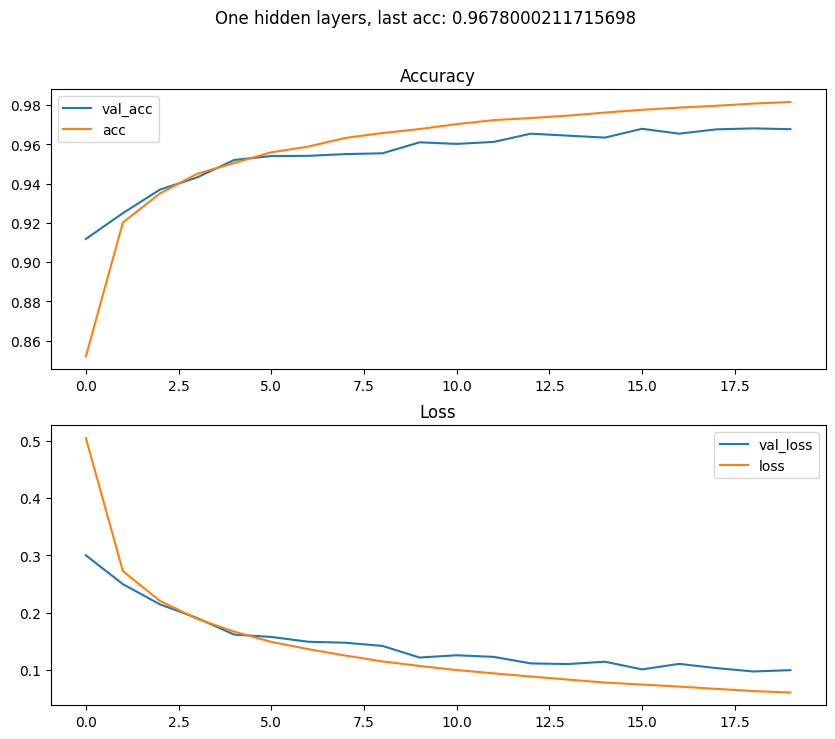

In [25]:
fig, ax = plt.subplots(2, 1, figsize=(10, 8))
fig.suptitle(f'One hidden layers, last acc: {history_one_hid_lrng_01["val_acc"][-1]}')

ax[0].plot(history_one_hid_lrng_01['val_acc'], label='val_acc')
ax[0].plot(history_one_hid_lrng_01['acc'], label='acc')
ax[0].legend()
ax[0].set_title('Accuracy')
 
ax[1].plot(history_one_hid_lrng_01['val_loss'], label='val_loss')
ax[1].plot(history_one_hid_lrng_01['loss'], label='loss')
ax[1].legend()
ax[1].set_title('Loss')

Результат майже не змінився

## 0.05

In [26]:
hidden_model = HiddenModel(X_train.shape[1], y_train.shape[1])

print(f"Starting loss: {loss(y_train, hidden_model.forward(X_train)).numpy()}")

history_one_hid_lrng_005 = training_loop(hidden_model, X_train, y_train, layers=1, lrng_rate=0.05, epochs=20)

Starting loss: 11.082124314867004
Epoch 0: Loss = 0.3564 Val Loss = 0.1939,  Val acc = 0.9394999742507935

Epoch 10: Loss = 0.0567 Val Loss = 0.1035,  Val acc = 0.970300018787384



Text(0.5, 1.0, 'Loss')

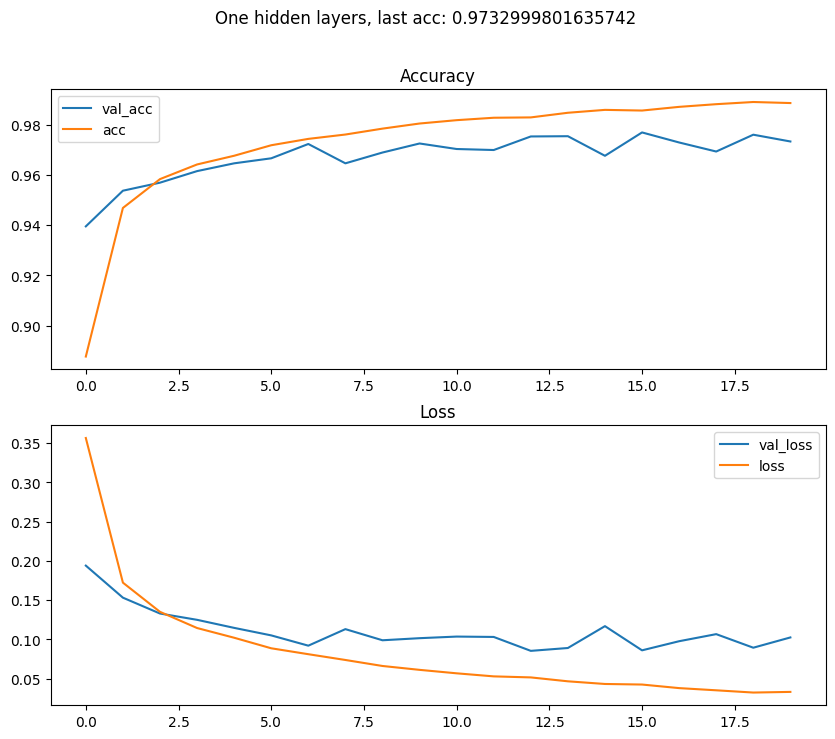

In [27]:
fig, ax = plt.subplots(2, 1, figsize=(10, 8))
fig.suptitle(f'One hidden layers, last acc: {history_one_hid_lrng_005["val_acc"][-1]}')

ax[0].plot(history_one_hid_lrng_005['val_acc'], label='val_acc')
ax[0].plot(history_one_hid_lrng_005['acc'], label='acc')
ax[0].legend()
ax[0].set_title('Accuracy')
 
ax[1].plot(history_one_hid_lrng_005['val_loss'], label='val_loss')
ax[1].plot(history_one_hid_lrng_005['loss'], label='loss')
ax[1].legend()
ax[1].set_title('Loss')

Модель отримала трохи більше значення точності, але на мою думку це також не сильно вплинуло на результат

# Порівняння різних функцій активації на двошаровій моделі

На усіх шарах функції активації будуть однакові, тобто комбінацій не буде, інакше це тоді буде дуже велике порівняння

Parametric LeakyReLU я не знайшов у модулі tf.nn, тому його у порівнянні не буде, хоча насправді можна було б його зробити через Optuna, підібрати значення alpha для Leaky ReLU, але я вирішив, що це не доцільно, моделі і так довго навчаються і я вважаю, що у нас наврядчи великою стоїть проблема "dying ReLU"

## LeakyReLU

In [28]:
class LeakyTwoLayersModel(tf.Module):
  def __init__(self, in_features, out_features, name=None):
    super().__init__(name=name)
    self.w0 = tf.Variable(tf.random.normal([in_features, 100]), name='w0')
    self.b0 = tf.Variable(tf.random.normal([1]), name='b0')

    self.w1 = tf.Variable(tf.random.normal([100, 50]), name='w1')
    self.b1 = tf.Variable(tf.random.normal([1]), name='b1')

    self.w2 = tf.Variable(tf.random.normal([50, 15]), name='w2')
    self.b2 = tf.Variable(tf.random.normal([1]), name='b2')

    self.w3 = tf.Variable(tf.random.normal([15, out_features]), name='w3')
    self.b3 = tf.Variable(tf.random.normal([1]), name='b3')

  def forward(self, x0):
    x1 = tf.nn.leaky_relu(tf.matmul(x0, self.w0) + self.b0)
    x2 = tf.nn.leaky_relu(tf.matmul(x1, self.w1) + self.b1)
    x3 = tf.nn.leaky_relu(tf.matmul(x2, self.w2) + self.b2)
    return (tf.matmul(x3, self.w3) + self.b3)

  def predict(self, X):
    return tf.argmax(tf.nn.softmax(self.forward(X)), axis=1)

In [29]:
%%time

leaky_model = LeakyTwoLayersModel(X_train.shape[1], y_train.shape[1])

print(f"Starting loss: {loss(y_train, leaky_model.forward(X_train)).numpy()}")

history_leaky = training_loop(leaky_model, X_train, y_train, layers=1, lrng_rate=0.1, epochs=20)

Starting loss: 10.25902215999539
Epoch 0: Loss = 0.4741 Val Loss = 0.2934,  Val acc = 0.9103999733924866

Epoch 10: Loss = 0.0975 Val Loss = 0.1132,  Val acc = 0.9656000137329102

CPU times: user 1min 48s, sys: 12.2 s, total: 2min
Wall time: 1min 27s


Text(0.5, 1.0, 'Loss')

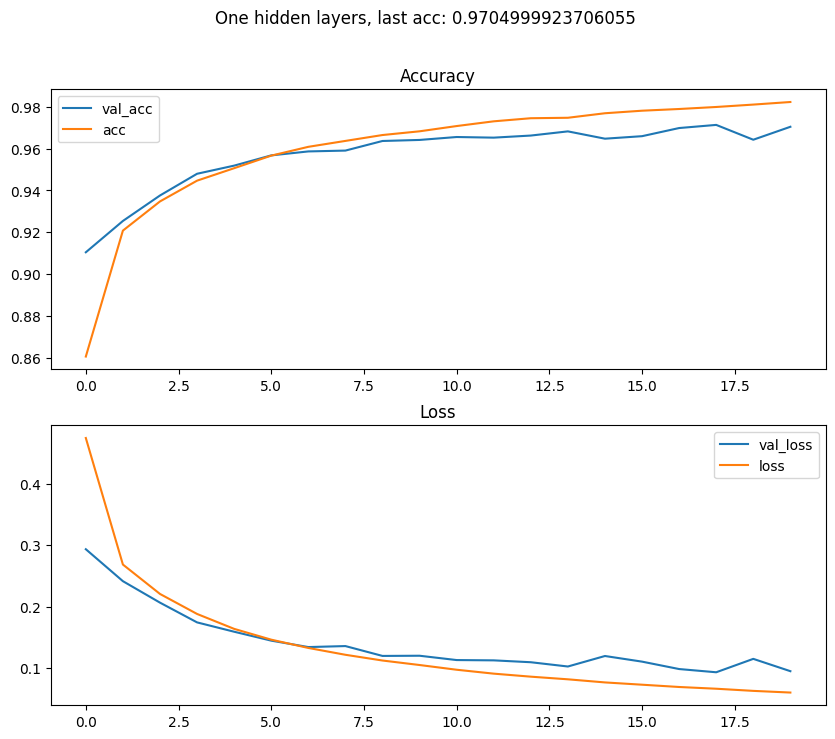

In [30]:
fig, ax = plt.subplots(2, 1, figsize=(10, 8))
fig.suptitle(f'One hidden layers, last acc: {history_leaky["val_acc"][-1]}')

ax[0].plot(history_leaky['val_acc'], label='val_acc')
ax[0].plot(history_leaky['acc'], label='acc')
ax[0].legend()
ax[0].set_title('Accuracy')
 
ax[1].plot(history_leaky['val_loss'], label='val_loss')
ax[1].plot(history_leaky['loss'], label='loss')
ax[1].legend()
ax[1].set_title('Loss')

Зміна шару майже не вплинула на результат

## ELU

In [31]:
class ELUTwoLayersModel(tf.Module):
  def __init__(self, in_features, out_features, name=None):
    super().__init__(name=name)
    self.w0 = tf.Variable(tf.random.normal([in_features, 100]), name='w0')
    self.b0 = tf.Variable(tf.random.normal([1]), name='b0')

    self.w1 = tf.Variable(tf.random.normal([100, 50]), name='w1')
    self.b1 = tf.Variable(tf.random.normal([1]), name='b1')

    self.w2 = tf.Variable(tf.random.normal([50, 15]), name='w2')
    self.b2 = tf.Variable(tf.random.normal([1]), name='b2')

    self.w3 = tf.Variable(tf.random.normal([15, 10]), name='w3')
    self.b3 = tf.Variable(tf.random.normal([1]), name='b3')

  def forward(self, x0):
    x1 = tf.nn.elu(tf.matmul(x0, self.w0) + self.b0)
    x2 = tf.nn.elu(tf.matmul(x1, self.w1) + self.b1)
    x3 = tf.nn.elu(tf.matmul(x2, self.w2) + self.b2)
    return (tf.matmul(x3, self.w3) + self.b3)
    
  def predict(self, X):
    return tf.argmax(tf.nn.softmax(self.forward(X)), axis=1)

In [32]:
%%time

elu_model = ELUTwoLayersModel(X_train.shape[1], y_train.shape[1], name='no_layers')

print(f"Starting loss: {loss(y_train, elu_model.forward(X_train)).numpy()}")

history_elu = training_loop(elu_model, X_train, y_train, layers=1, lrng_rate=0.1, epochs=20)

Starting loss: 13.853060126475862
Epoch 0: Loss = 0.4503 Val Loss = 0.2981,  Val acc = 0.911300003528595

Epoch 10: Loss = 0.0976 Val Loss = 0.1081,  Val acc = 0.9652000069618225

CPU times: user 1min 48s, sys: 11.9 s, total: 2min
Wall time: 1min 27s


Text(0.5, 1.0, 'Loss')

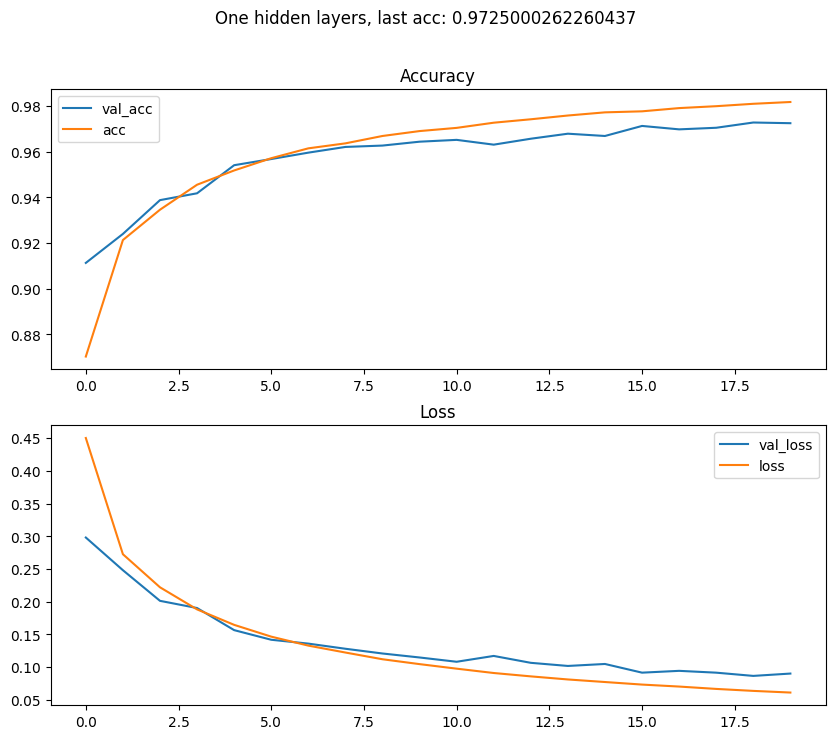

In [33]:
fig, ax = plt.subplots(2, 1, figsize=(10, 8))
fig.suptitle(f'One hidden layers, last acc: {history_elu["val_acc"][-1]}')

ax[0].plot(history_elu['val_acc'], label='val_acc')
ax[0].plot(history_elu['acc'], label='acc')
ax[0].legend()
ax[0].set_title('Accuracy')
 
ax[1].plot(history_elu['val_loss'], label='val_loss')
ax[1].plot(history_elu['loss'], label='loss')
ax[1].legend()
ax[1].set_title('Loss')

Тут також зміна функції майже не вплинула на результат

### Порівняння усіх функцій

Text(0.5, 1.0, 'Validation loss')

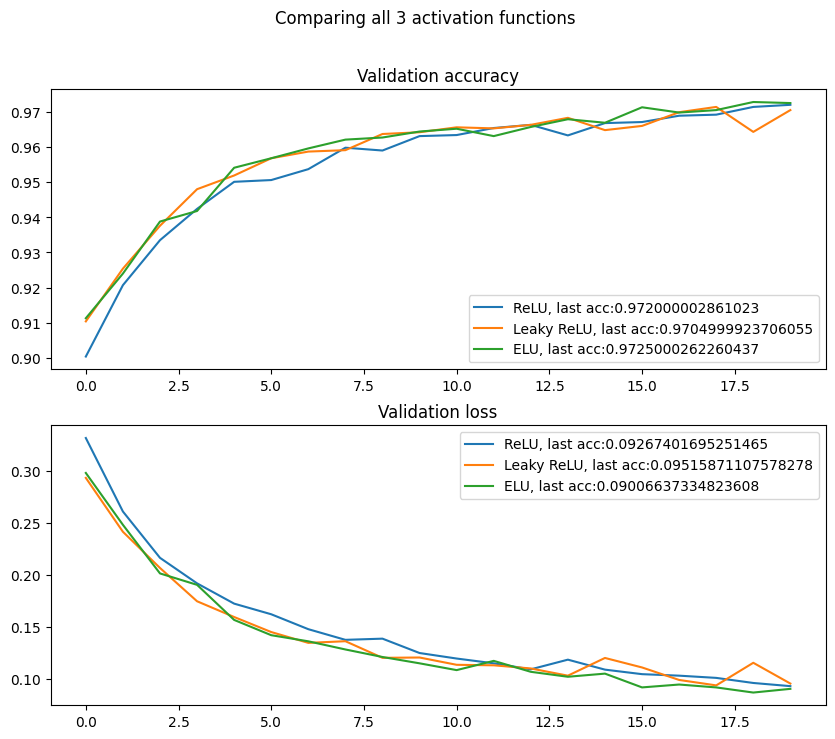

In [34]:
fig, ax = plt.subplots(2, 1, figsize=(10, 8))
fig.suptitle(f'Comparing all 3 activation functions')

ax[0].plot(history_two_hid['val_acc'], label=f'ReLU, last acc:{history_two_hid["val_acc"][-1]}')
ax[0].plot(history_leaky['val_acc'], label=f'Leaky ReLU, last acc:{history_leaky["val_acc"][-1]}')
ax[0].plot(history_elu['val_acc'], label=f'ELU, last acc:{history_elu["val_acc"][-1]}')
ax[0].legend()
ax[0].set_title('Validation accuracy')

ax[1].plot(history_two_hid['val_loss'], label=f'ReLU, last acc:{history_two_hid["val_loss"][-1]}')
ax[1].plot(history_leaky['val_loss'], label=f'Leaky ReLU, last acc:{history_leaky["val_loss"][-1]}')
ax[1].plot(history_elu['val_loss'], label=f'ELU, last acc:{history_elu["val_loss"][-1]}')
ax[1].legend()
ax[1].set_title('Validation loss')

Усі функції активації які ми перевірили майже не вплинули на результат, я гадаю це тому що ми і так отримуємо дуже високі значення метрик і з такими значеннями дуже складно зробити помітну різницю

# Давайте подивимося на те які зображення наша найкраща модель не правильно класифікувала

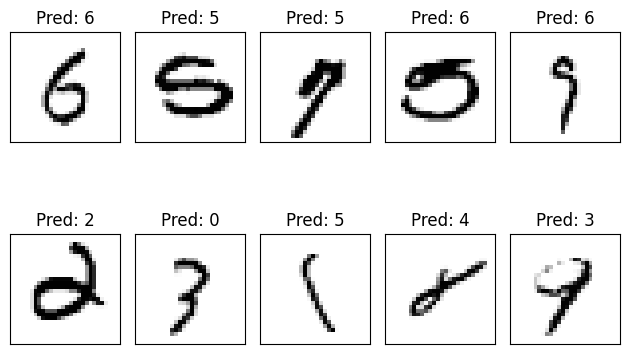

In [37]:
fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True)
ax = ax.flatten()

pred_labels = two_layers_model.predict(X_test)
misclassified_indices = np.where(pred_labels != y_test_not_encoded)[0]

for i in range(10):

    misclassified_image = X_test.numpy()[misclassified_indices[i]].reshape(28, 28)

    ax[i].imshow(misclassified_image, cmap='Greys')  
    ax[i].set_title(f"Pred: {pred_labels[i]}")

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

Деякі з них справді більше схожі на класифікацію моделлю

# Висновки

Після зміни коду моделі показали себе краще, але навчалися набагато довше, щодо найкращої моделі, то це звісно двошарова, але зміна функції активації, або швидкості навчання не сильно вплинули на результат